In [2]:
from fenics import *
import numpy as np
from vedo.dolfin import plot, Latex, clear, histogram
import matplotlib.pyplot as plt
import pickle 
import time

from Function_Solver import solver_para, solver_run

from random_walk_MCMC_integrate import *

In [7]:
alpha_star = 0
alpha0 = 1
iterations = 10
tau = 1/10
epsilon = 1/20
num_steps = 100
nx = 36
ny = 36

sigma_q = 0.1
sigma_p = 1
mu_p = 0
sigma_l = 0.2

var_noise = 0.3

V, u, v, u_n, f, u_D, bc, mesh = solver_para(nx, ny, tau)
y_star = solver_run(alpha_star, V, u, v, u_n, f, u_D, bc, epsilon, num_steps)
# noise = np.random.normal(np.zeros((nx + 1)*(ny + 1)), var_noise)
# noise_function = Function(V)
# noise_function.vector()[:] = noise

for f in y_star:
    noise = np.random.normal(np.zeros((nx + 1)*(ny + 1)), var_noise)
    # noise_function = Function(V)
    f.vector()[:] += noise
    # y.append(f + noise_function)

y = y_star

for i in range(1, 50):

    alpha_list_i = random_walk_metropolis(alpha0, y, sigma_q, sigma_p, sigma_l, mu_p, nx, ny, tau, epsilon, iterations, num_steps, i)

    name_file = "Function_Distributions/"+str(i)+"_steps_considered.csv"
    with open(name_file, 'wb') as f:
        pickle.dump(alpha_list_i, f)




Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

KeyboardInterrupt: 

In [27]:
with open('Function_Distributions/1_steps_considered_time_1438.648771762848.csv', 'rb') as file:
    alpha_list_1 = pickle.load(file)
with open('Function_Distributions/2_steps_considered_time_1668.6826422214508.csv', 'rb') as file:
    alpha_list_2 = pickle.load(file) 
with open('Function_Distributions/6_steps_considered_time_2431.4907813072205.csv', 'rb') as file:
    alpha_list_6 = pickle.load(file)
with open('Function_Distributions/10_steps_considered_time_3139.3462188243866.csv', 'rb') as file:
    alpha_list_10 = pickle.load(file)
with open('Function_Distributions/14_steps_considered_time_3975.9966402053833.csv', 'rb') as file:
    alpha_list_14 = pickle.load(file)
with open('Function_Distributions/18_steps_considered_time_4496.125002861023.csv', 'rb') as file:
    alpha_list_18 = pickle.load(file)
with open('Function_Distributions/22_steps_considered_time_5374.013044834137.csv', 'rb') as file:
    alpha_list_22 = pickle.load(file)
with open('Function_Distributions/26_steps_considered_time_6817.443048238754.csv', 'rb') as file:
    alpha_list_26 = pickle.load(file)

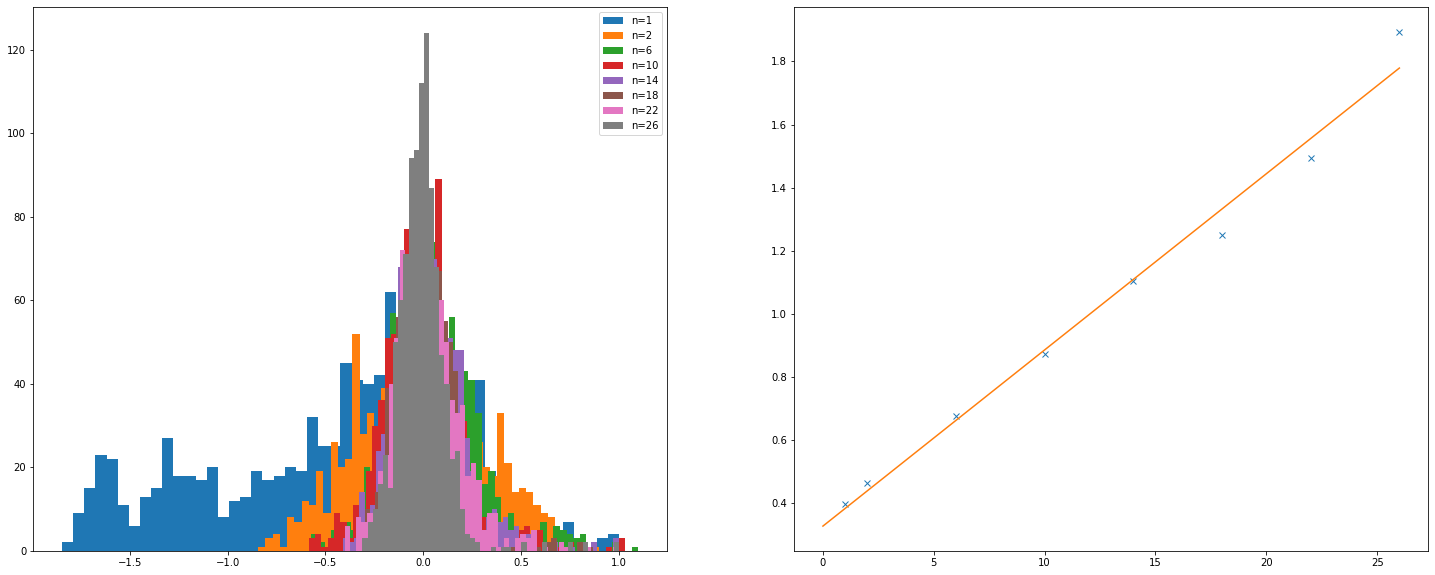

In [55]:
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (25, 10))

ax[0].hist(alpha_list_1,  bins, label = 'n=1')
ax[0].hist(alpha_list_2,  bins, label = 'n=2')
ax[0].hist(alpha_list_6,  bins, label = 'n=6')
ax[0].hist(alpha_list_10, bins, label = 'n=10')
ax[0].hist(alpha_list_14, bins, label = 'n=14')
ax[0].hist(alpha_list_18, bins, label = 'n=18')
ax[0].hist(alpha_list_22, bins, label = 'n=22')
ax[0].hist(alpha_list_26, bins, label = 'n=26')
ax[0].legend()
ax[1].plot([1,2,6,10,14,18,22,26],np.array([1438.648771762848, 1668.6826422214508, 2431.4907813072205, 3139.346218824386, 3975.996640205383, 4496.125002861023, 5374.013044834137, 6817.443048238754])/3600, 'x')
m, c = np.polyfit([1,2,6,10,14,18,22,26], np.array([1438.648771762848, 1668.6826422214508, 2431.4907813072205, 3139.346218824386, 3975.996640205383, 4496.125002861023, 5374.013044834137, 6817.443048238754])/3600, 1)
x = np.linspace(0,26, 100)
y = m*x + c
ax[1].plot(x, y)

In [53]:
np.polyfit([1,2,6,10,14,18,22,26], np.array([1438.648771762848, 1668.6826422214508, 2431.4907813072205, 3139.346218824386, 3975.996640205383, 4496.125002861023, 5374.013044834137, 6817.443048238754])/3600, 1)

array([0.05581443, 0.32810708])